In [1]:
import sqlite3
import pandas as pd

cnx = sqlite3.connect('/home/varuni/Documents/ML-LabProj/amazon-fine-food-reviews/database.sqlite')

df = pd.read_sql_query("SELECT * FROM Reviews", cnx)

In [2]:
cols = list(df.columns.values)
print(cols)

['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


In [3]:
from collections import Counter
import matplotlib.pyplot as plt

smt = []
for i in range (len(df)):
    if(df['Score'][i] > 2.5):
        smt.append(1) 
    else:
        smt.append(-1)
senti = pd.Series(smt)
df['senti'] = senti.values
count = Counter(smt)
print(count)


Counter({1: 486417, -1: 82037})


Text(0.5,1,'Frequency Distribution of the Sentiments')

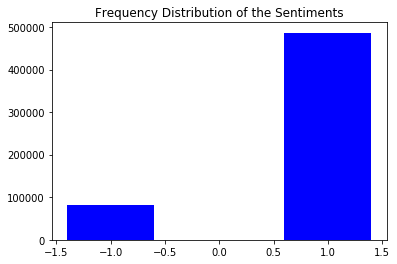

In [4]:
plt.bar(count.keys(),count.values(),color='blue')
plt.title("Frequency Distribution of the Sentiments")

In [11]:
import nltk
import random
from nltk.tokenize import RegexpTokenizer
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [6]:
tokenized = []
tok = RegexpTokenizer(r'\w+')
for i in range(1,len(df)):
    tokenized.append(tok.tokenize(df['Text'][i]))

pickle.dump(tokenized,open('tokens.pkl','wb'))

In [7]:
print(tokenized[:100])


[['Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', 'Jumbo'], ['This', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few', 'centuries', 'It', 'is', 'a', 'light', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', 'in', 'this', 'case', 'Filberts', 'And', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 'and', 'then', 'liberally', 'coated', 'with', 'powdered', 'sugar', 'And', 'it', 'is', 'a', 'tiny', 'mouthful', 'of', 'heaven', 'Not', 'too', 'chewy', 'and', 'very', 'flavorful', 'I', 'highly', 'recommend', 'this', 'yummy', 'treat', 'If', 'you', 'are', 'familiar', 'with', 'the', 'story', 'of', 'C', 'S', 'Lewis', 'The', 'Lion', 'The', 'Witch', 'and', 'The', 'Wardrobe', 'this', 'is', 'the', 'treat', 'that', 'seduces', 'Edmund', 'into', 'selling', 'out', 'his', '

In [18]:
'''def split_into_lemmas(tweet):
    bigram_vectorizer = CountVectorizer(ngram_range=(1, 3), token_pattern=r'\b\w+\b', min_df=1)
    analyze = bigram_vectorizer.build_analyzer()
    return analyze(tweet)


##
# begin learning
#

bow_transformer = CountVectorizer(analyzer = split_into_lemmas, stop_words='english', strip_accents='ascii').fit(df['Text'])


text_bow = bow_transformer.transform(df['Text'])

tfidf_transformer = TfidfTransformer().fit(text_bow)

tfidf = tfidf_transformer.transform(text_bow)

text_tfidf = tfidf_transformer.transform(text_bow)

classifier_nb = MultinomialNB(class_prior = None).fit(text_tfidf, df['senti'])'''


#
# end learning
##
texts = df[1:10]
for x in texts : 
    bow_tweet = bow_transformer.transform(x)
    print(bow_tweet)
    tfidf_tweet = tfidf_transformer.transform(bow_tweet)

    print(classifier_nb.predict(tfidf_tweet))


ValueError: Iterable over raw text documents expected, string object received.